In [ ]:
# import the required packages

## 1. HR Analytics

### 1.1 Load and Explore the data

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from datetime import datetime
from datetime import date
import math

In [2]:
df = pd.read_csv('hr_data.csv')
df_copy = df.copy()
df_copy.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df_copy.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df_copy.describe()


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


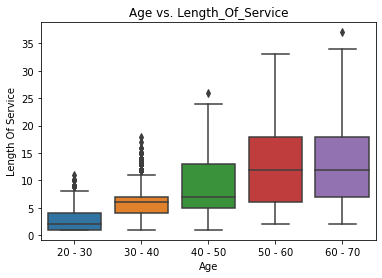

In [6]:
# df_copy['education'].unique() # Master's & Above, Bachelor's, Below Sec, NULL
# df_copy['previous_year_rating'].unique() # NULL - 5
# df_copy['no_of_trainings'].unique() # 1 - 10

# df_copy.groupby('age').length_of_service.mean().plot.bar() 

# This means that once a employee joined the company, they
# tend to stay in the company for long duration.


bins= [19, 29, 39, 49, 59, 69] #, 79, 89]
labels = ['20 - 30','30 - 40','40 - 50','50 - 60','60 - 70'] #, '70 - 80', '80 - 90']
df_copy["Age_Group"] = pd.cut(df_copy["age"], bins=bins, labels=labels) # "Append" the age group to the table
                                                                        # Compare the age value with the bins and allocate a label

sns.boxplot(y='length_of_service', x=df_copy['Age_Group'], data=df_copy)
plt.xlabel('Age')                                          
plt.ylabel('Length Of Service')
plt.title('Age vs. Length_Of_Service')

plt.show()

[21512, 13173, 9000, 7160, 1401, 9442, 3307, 2548, 1132]


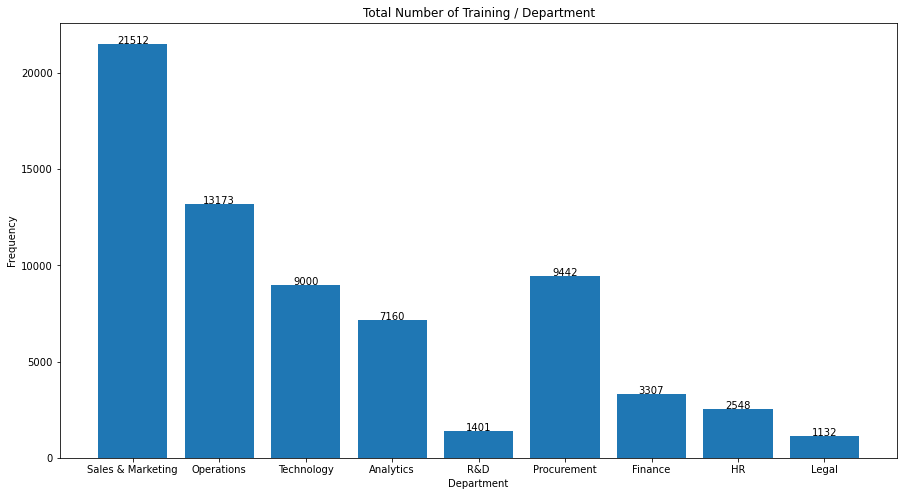

In [7]:
# Total # of training / department
count = 0
counter0 = 0 # Sales
counter1 = 0 # Operations
counter2 = 0 # Technology
counter3 = 0 # Analytics
counter4 = 0 # R&D
counter5 = 0 # Procurement
counter6 = 0 # Finance
counter7 = 0 # HR
counter8 = 0 # Legal

list = ['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
counterlist = [counter0, counter1, counter2, counter3, counter4, counter5, counter6, counter7, counter8]

df_dept_training = df_copy[['department', 'no_of_trainings']]

# Loop through list to sum up the hours of training per department
for n in list:
    df_dept_training_narrowed = df_dept_training[df_dept_training.loc[:, 'department'] == n]
    counterlist[count]+=sum(df_dept_training_narrowed.no_of_trainings)
    count+=1

print(counterlist)
count = 0

plt.figure(figsize=(15,8))
plt.bar(list, counterlist) # Swap to barh for horizontal
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Total Number of Training / Department')

# This displays the values in the chart
for i in counterlist:
    plt.text(list[count], i, str(i), ha='center') # Swap around x and y for horizontal / veritcal
    count+=1
    
plt.show()


[16840, 11348, 7138, 5352, 999, 7138, 2536, 2418, 1039]


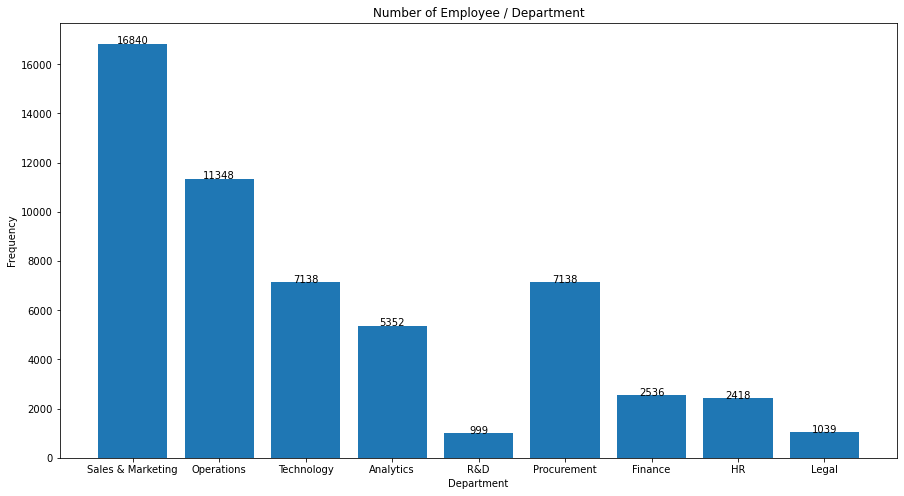

In [8]:
# df_copy['department'].unique()
count = 0
counter0 = 0 # Sales
counter1 = 0 # Operations
counter2 = 0 # Technology
counter3 = 0 # Analytics
counter4 = 0 # R&D
counter5 = 0 # Procurement
counter6 = 0 # Finance
counter7 = 0 # HR
counter8 = 0 # Legal

list = ['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
counterlist = [counter0, counter1, counter2, counter3, counter4, counter5, counter6, counter7, counter8]

# for i in df_copy['department']:
# #     print(i)
#     for n in list:
#         if i == n:
#             counterlist[count]+=1
#         else:
#             count+=1
#             if count == 9:
#                 count = 0

# Loop through the list (i) to match with department's coloumn and find the length of it (Department)
for i in list:
    temp = len(df_copy[df_copy['department']==i])
    counterlist[count]+=temp
    count+=1

count = 0

print(counterlist)

plt.figure(figsize=(15,8))
plt.bar(list, counterlist) # Swap to barh for horizontal
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Number of Employee / Department')

# This displays the values in the chart
for i in counterlist:
    plt.text(list[count], i, str(i), ha='center') # Swap around x and y for horizontal / veritcal
    count+=1


Index:  20 - 30  Value:  14453
Index:  30 - 40  Value:  28030
Index:  40 - 50  Value:  8952
Index:  50 - 60  Value:  3156
Index:  60 - 70  Value:  217


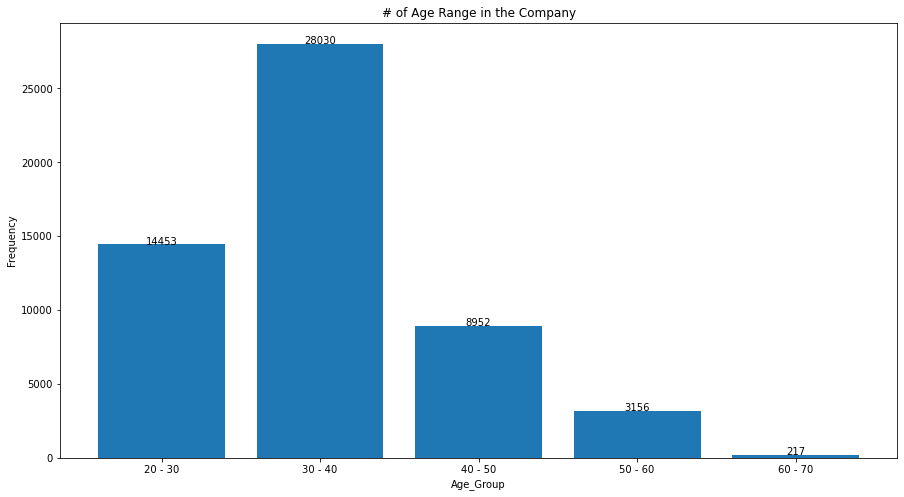

In [9]:
# Number of Employees that falls in a age group category (Before mapping to int)
plt.figure(figsize=(15,8))
y = df_copy.Age_Group.value_counts().sort_index() # Values of the bars
x = ['20 - 30','30 - 40','40 - 50','50 - 60','60 - 70'] # There is no employee that is 61 and older = df_copy[df_copy['age']>=60]

bars = plt.bar(x, y) # Swap to barh for horizontal
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.title('# of Age Range in the Company')

# This displays the values in the chart
for index, value in enumerate(y):
    print("Index: ",x[index], " Value: ", value)
    plt.text(index, value, str(value), ha = 'center') # Swap around x and y for horizontal / veritcal

# for i in bars.patches:
#     bars.annotate(str(i.get_height()), (i.get_x(), i.get_height()), va='center', ha='center')

Label: 20 - 30
Percentage of label: 26.37%
Value of percentage 14453

Label: 30 - 40
Percentage of label: 51.14%
Value of percentage 28030

Label: 40 - 50
Percentage of label: 16.33%
Value of percentage 8952

Label: 50 - 60
Percentage of label: 5.76%
Value of percentage 3156

Label: 60 - 70
Percentage of label: 0.40%
Value of percentage 217



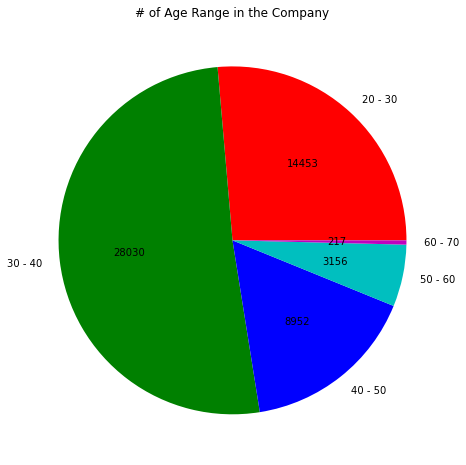

In [10]:
count = 0
def absolute_value(percent):
    global count
    value  = np.round(percent/100 * y.sum(), 0) # y = df_copy.Age_Group.value_counts().sort_index()
    print("Label:", x[count])
    print("Percentage of label: {:.2f}%".format(percent))
    print("Value of percentage", int(value))
    print("")
    count+=1
    return int(value)

colors = ['r', 'g', 'b', 'c', 'm']
plt.figure(figsize=(10,8))
plt.pie(y, colors= colors, labels=x, autopct=absolute_value) # function runs 5 times, parsing in the percentage of
plt.title('# of Age Range in the Company')                   # respective values against the sum.
# plt.legend(x, loc="upper right")
plt.show()


In [11]:
# Remove the region to leave just the int behind
df_region = []

# Try to verify if char is int or string. Returns True if it is int
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False
    
count = 0
for i in df_copy['region']:
    try:
        temp = ''
        for n in i:
            if is_number(n) == True: # Stores the int in a temp variable if it receives True
                temp+=n
#         df_copy['region'][count].replace(i, str(temp))
        df_region.append(int(temp))  # Appends the full int once string have finished iterating
        temp = ''
        count+=1
        
    except KeyError:
        count+=1 # Skip the index that was removed because of NULL values
        continue  
        
df_copy['region'] = df_region


Text(0.5, 1.0, '# of Training by Age')

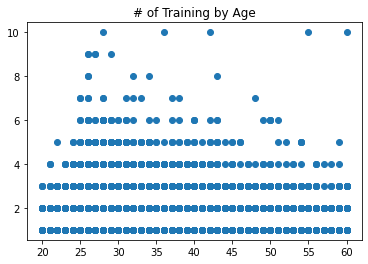

In [12]:
x = df_copy['age']
y = df_copy['no_of_trainings']
plt.scatter(x, y)
plt.title('# of Training by Age')


[1213, 1023, 768, 512, 69, 688, 206, 136, 53]


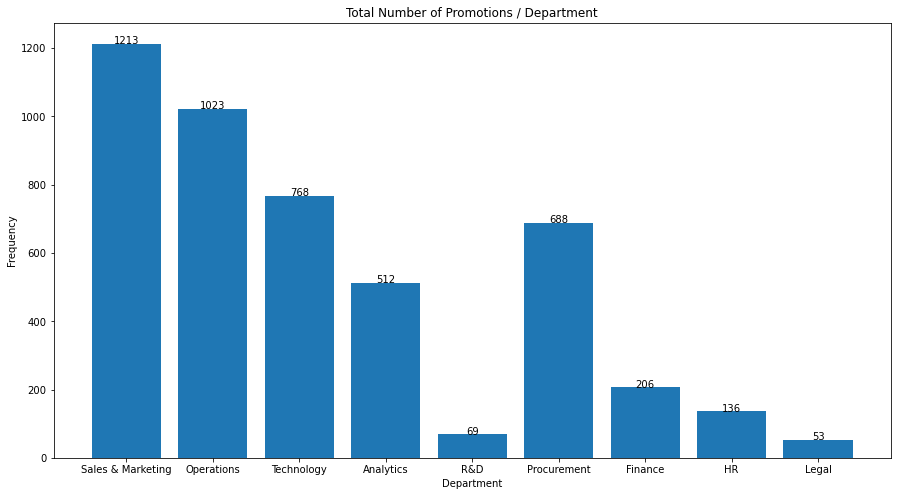

In [13]:
# Total # of training / department
count = 0
counter0 = 0 # Sales
counter1 = 0 # Operations
counter2 = 0 # Technology
counter3 = 0 # Analytics
counter4 = 0 # R&D
counter5 = 0 # Procurement
counter6 = 0 # Finance
counter7 = 0 # HR
counter8 = 0 # Legal

list = ['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']
counterlist = [counter0, counter1, counter2, counter3, counter4, counter5, counter6, counter7, counter8]

df_dept_promote = df_copy[['department', 'is_promoted']]

for n in list:
    df_dept_promote_narrowed = df_dept_promote[df_dept_promote.loc[:, 'department'] == n]
    counterlist[count]+=sum(df_dept_promote_narrowed.is_promoted)
    count+=1

print(counterlist)
count = 0

plt.figure(figsize=(15,8))
plt.bar(list, counterlist) # Swap to barh for horizontal
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Total Number of Promotions / Department')

for i in counterlist:
    plt.text(list[count], i, str(i), ha='center') # Swap around x and y for horizontal / veritcal
    count+=1
    
plt.show()


Text(0.5, 1.0, 'Department vs. Age Group')

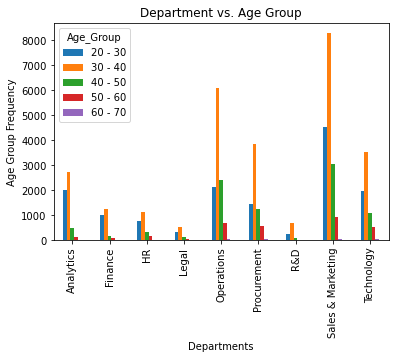

In [14]:
# Find the Year of employment? (Unknown year of dataset)
# Number of Employee per Age_Group in each Dept?

df_copy.groupby(['Age_Group']).department.value_counts().unstack(0).plot.bar()
plt.xlabel('Departments')
plt.ylabel('Age Group Frequency')
plt.title('Department vs. Age Group')

### 1.2 Cleanse and Transform the data

In [15]:
df_copy.isnull().sum()


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
Age_Group                  0
dtype: int64

In [16]:
# df_copy.isnull().sum()
df_copy['education'].mode()[0]

"Bachelor's"

In [17]:
df_copy['education'] = df_copy['education'].fillna(df_copy['education'].mode()[0]) # Replace with mode


In [18]:
df_copy['previous_year_rating'] = df_copy['previous_year_rating'].fillna(round(df_copy['previous_year_rating'].mean(), 1)) # Replace with mode


In [19]:
list = ['Sales & Marketing', 'Operations', 'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal']

df_copy['department'] = df_copy['department'].map( {'Sales & Marketing': 0, 'Operations': 1, 'Technology': 2, 
                                                'Analytics': 3, 'R&D': 4, 'Procurement': 5, 'Finance': 6,
                                                'HR': 7, 'Legal': 8} ).astype(int) # Convert to int


In [20]:
df_copy['education'] = df_copy['education'].map( {"Bachelor's": 0, "Master's & above": 1, "Below Secondary": 2} ).astype(int) # Convert to int

In [21]:
df_copy['gender'] = df_copy['gender'].map( {'f': 0, 'm': 1} ).astype(int) # Convert to int


In [22]:
df_copy['recruitment_channel'] = df_copy['recruitment_channel'].map( {'other': 0, 'sourcing': 1, 'referred': 2} ).astype(int) # Convert to int


In [23]:
df_copy['Age_Group'] = df_copy['Age_Group'].map( {'20 - 30': 2,'30 - 40': 3,'40 - 50': 4,'50 - 60': 5,'60 - 70': 6} ).astype(int) # Convert to int


In [24]:
df_copy = df_copy.drop(['employee_id'], axis = 1)


In [25]:
df_copy.head()
# Department        Gender        Education                 Recruitment Channel        Age_Group (Start from 2 for easier identification)
# 0 = Sales         0 = Female    0 = Bachelor's            0 = Other                  2 = 20 - 30
# 1 = Operations    1 = Male      1 = Master's and above    1 = Sourcing               3 = 30 - 40
# 2 = Technology                  2 = Below Secondary       2 = Referred               4 = 40 - 50
# 3 = Analytics                                                                        5 = 50 - 60
# 4 = R&D                                                                              6 = 60 - 70
# 5 = Procurement                                                                      
# 6 = Finance
# 7 = HR
# 8 = Legal

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age_Group
0,0,7,1,0,1,1,35,5.0,8,1,0,49,0,3
1,1,22,0,1,0,1,30,5.0,4,0,0,60,0,3
2,0,19,0,1,1,1,34,3.0,7,0,0,50,0,3
3,0,23,0,1,0,2,39,1.0,10,0,0,50,0,3
4,2,26,0,1,0,1,45,3.0,2,0,0,73,0,4


In [26]:
df_copy_ispromoted_0 = df_copy[df_copy['is_promoted']==0]
df_copy_ispromoted_1 = df_copy[df_copy['is_promoted']==1]
df_copy_sampled = df_copy_ispromoted_0.sample(n=len(df_copy_ispromoted_1), random_state=2).copy()


In [27]:
# Stratified Sampling of Target Variable 'is_promoted'
df_copy_new=pd.concat([df_copy_ispromoted_1,df_copy_sampled],axis=0)
df_copy_new['is_promoted'].value_counts()
# df_copy_new

1    4668
0    4668
Name: is_promoted, dtype: int64

### 1.3 Correlation Analysis

In [28]:
df_copy.corr()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Age_Group
department,1.000000,-0.053978,0.069451,-0.078665,-0.011459,-0.005758,-0.050313,0.061850,-0.048833,0.054972,0.003873,0.334774,0.001357,-0.048017
region,-0.053978,1.000000,-0.124695,0.106005,-0.024359,-0.004304,-0.250709,-0.022065,-0.169966,-0.009059,0.006364,0.028805,-0.011007,-0.242024
education,0.069451,-0.124695,1.000000,-0.035418,-0.006722,-0.028699,0.244200,0.020145,0.168225,0.015525,-0.003006,0.034936,0.026244,0.243834
gender,-0.078665,0.106005,-0.035418,1.000000,0.008850,0.084501,-0.016293,-0.023400,-0.019675,-0.037400,0.002381,-0.024494,-0.011109,-0.016685
recruitment_channel,-0.011459,-0.024359,-0.006722,0.008850,1.000000,-0.014879,-0.027118,0.031968,-0.014669,0.018660,-0.003819,0.009925,0.009438,-0.026989
no_of_trainings,-0.005758,-0.004304,-0.028699,0.084501,-0.014879,1.000000,-0.081278,-0.059974,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,-0.075976
age,-0.050313,-0.250709,0.244200,-0.016293,-0.027118,-0.081278,1.000000,0.007591,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,0.935662
previous_year_rating,0.061850,-0.022065,0.020145,-0.023400,0.031968,-0.059974,0.007591,1.000000,0.002312,0.338136,0.026667,0.072068,0.153422,0.007421
length_of_service,-0.048833,-0.169966,0.168225,-0.019675,-0.014669,-0.057275,0.657111,0.002312,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,0.622851
KPIs_met >80%,0.054972,-0.009059,0.015525,-0.037400,0.018660,-0.045576,-0.025592,0.338136,-0.077693,1.000000,0.097000,0.078391,0.221582,-0.023077


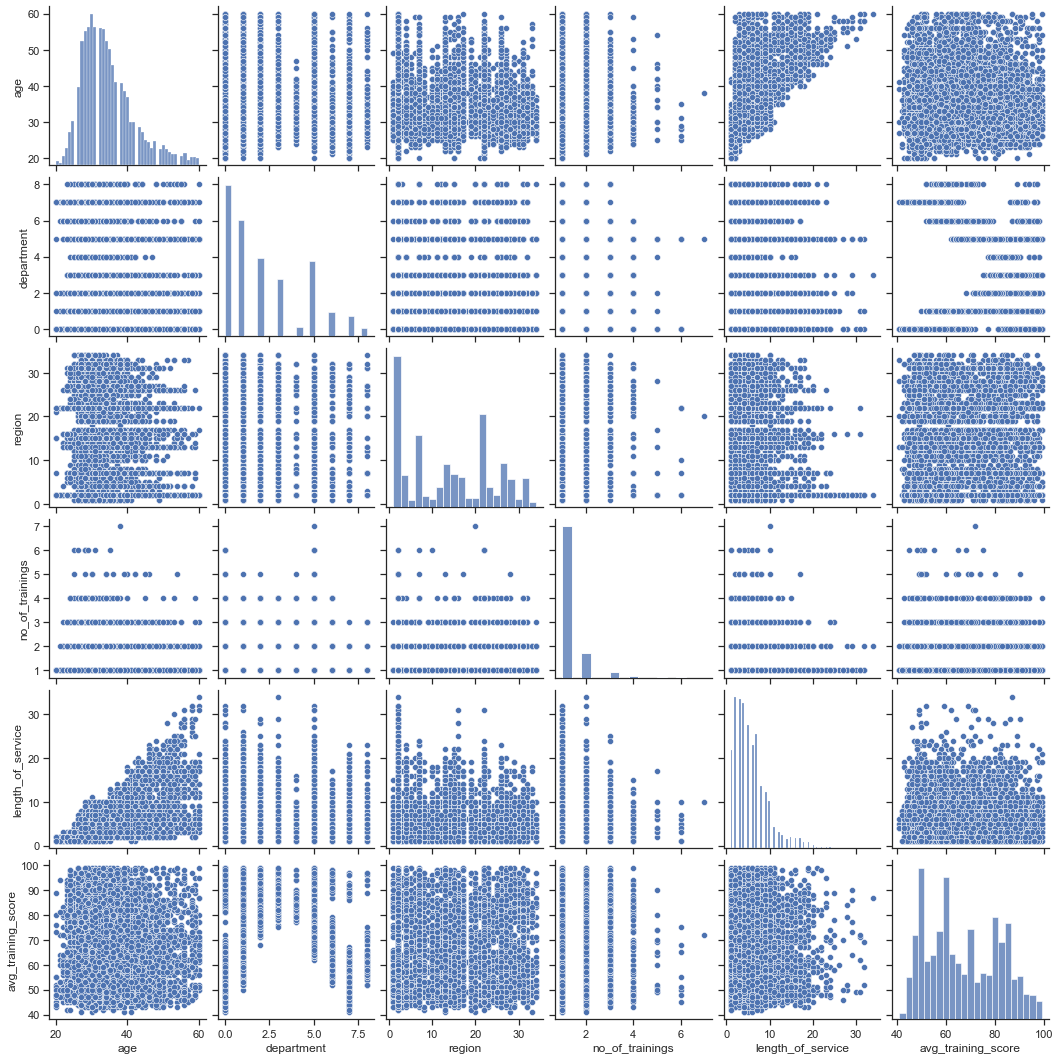

In [29]:
sns.set(style="ticks")
sns.pairplot(df_copy_new[['age', 'department', 'region', 'no_of_trainings', 'length_of_service', 'avg_training_score']])


### 1.4 Export the data

In [30]:
df_copy_new.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb Singapore

### 2.1 Load and Explore the data

In [30]:
df = pd.read_csv('listings.csv')
df_air = df.copy()
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [31]:
df_air.info()
# df_air

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [32]:
df_air.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

[6309, 508, 540, 346, 204]


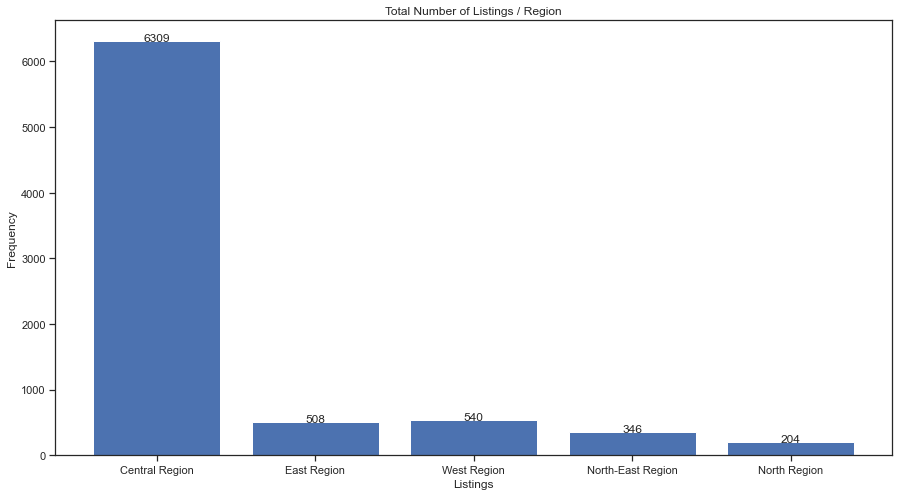

In [33]:
# Total # of Listings / Region
count = 0
counter0 = 0 # Central Region
counter1 = 0 # East Region
counter2 = 0 # West Region
counter3 = 0 # North-East Region
counter4 = 0 # North Region

list = ['Central Region', 'East Region', 'West Region', 'North-East Region', 'North Region']
counterlist = [counter0, counter1, counter2, counter3, counter4]

df_air_listings = df_air[['neighbourhood_group']]

for i in list:
    temp = len(df_air[df_air['neighbourhood_group']==i])
    counterlist[count]+=temp
    count+=1
    
print(counterlist)
count = 0

plt.figure(figsize=(15,8))
plt.bar(list, counterlist) # Swap to barh for horizontal
plt.xlabel('Listings')
plt.ylabel('Frequency')
plt.title('Total Number of Listings / Region')

for i in counterlist:
    plt.text(list[count], i, str(i), ha='center') # Swap around x and y for horizontal / veritcal
    count+=1
    
plt.show()


Text(0.5, 1.0, 'Neighborhood Group vs. Room Type')

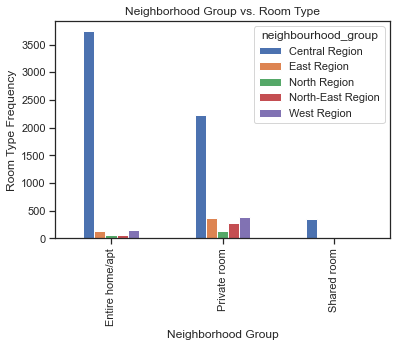

In [34]:
# Finding out how many Room Types there are in each Region
df_air.groupby(['neighbourhood_group']).room_type.value_counts().unstack(0).plot.bar()
plt.xlabel('Neighborhood Group')
plt.ylabel('Room Type Frequency')
plt.title('Neighborhood Group vs. Room Type')

# print(df_air.groupby(['neighbourhood_group']).room_type.value_counts().apply(np.array))

# ================== OUTPUT ==================
# neighbourhood_group  room_type      
# Central Region       Entire home/apt    3738
#                      Private room       2223
#                      Shared room         348

# East Region          Private room        366
#                      Entire home/apt     131
#                      Shared room          11

# North Region         Private room        142
#                      Entire home/apt      53
#                      Shared room           9

# North-East Region    Private room        272
#                      Entire home/apt      64
#                      Shared room          10
# West Region          Private room        378

#                      Entire home/apt     146
#                      Shared room          16

### 2.2 Cleanse and Transform the data

In [35]:
# df_air['room_type'].value_counts()
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [36]:
# neighbourhood - For loop convert to count
# neighbourhood_group: Central / East / West / North-East / North Regions
# room_type: Entire home/apt / Entire home / Shared room
# last_review - Convert to days since last review?

# Somehow an warning will pop out. Did not happen prior.
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].map( {"Central Region": 0, "East Region": 1, "West Region": 2, "North-East Region": 3, "North Region": 4} ).astype(int) # Convert to int
df_air['room_type'] = df_air['room_type'].map( {"Entire home/apt": 0, "Private room": 1, "Shared room": 2} ).astype(int) # Convert to int


In [37]:
# Somehow an warning will pop out. Did not happen prior. Checked values in list. Count matches df_air.info.
    
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

days = []
for i in df_air['last_review']:
    if pd.isna(i) == False:
        days.append(days_between(i, "2019-08-28")) # Verified
    else:
        days.append(None)
    
df_air['last_review_day_difference'] = days

# print(days_between('2020-12-10', str(date.today())))
# Dataset Generate - 28 August, Convert NaN values to Max Days + 1

In [39]:
# df_air['last_review_day_difference'].max() # Check for max value
df_air['last_review_day_difference'] = df_air['last_review_day_difference'].fillna(df_air['last_review_day_difference'].max() + 1).astype(int) # Replace with mode

df_air['reviews_per_month'] = df_air['reviews_per_month'].fillna(0) # Replace with mode


In [40]:
neighbourhood = []
df_air_neighbourhood = df_air['neighbourhood'].unique()
df_air_neighbourhood
# for i in df_air_neighbourhood:
#     neighbourhood.append(i) # Append the list of unique neighbourhoods to prepare for mapping
#     print(i)

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Jurong West', 'Rochor',
       'Queenstown', 'Serangoon', 'Marine Parade', 'Pasir Ris',
       'Toa Payoh', 'Outram', 'Punggol', 'Tanglin', 'Hougang', 'Kallang',
       'Novena', 'Downtown Core', 'Bukit Panjang', 'Singapore River',
       'Orchard', 'Ang Mo Kio', 'Bukit Batok', 'Museum', 'Sembawang',
       'Choa Chu Kang', 'Central Water Catchment', 'Sengkang', 'Clementi',
       'Jurong East', 'Bishan', 'Yishun', 'Mandai', 'Southern Islands',
       'Sungei Kadut', 'Western Water Catchment', 'Tuas', 'Marina South',
       'Lim Chu Kang'], dtype=object)

In [41]:
count = 0
neighbourhood_int = []

for i in df_air['neighbourhood']: # Ran into trouble using map. So i manually store it in list and override df_air['neighbourhood']
#     print(i)
    for n in df_air_neighbourhood:
        if i == n:
            neighbourhood_int.append(count) # Appending the values according the the location in the list
        count += 1
    count = 0

df_air['neighbourhood'] = neighbourhood_int # Replacing the Neighbourhood value with the int version

In [42]:
# df_air['neighbourhood']
# neighbourhood = 
# ['Woodlands','Bukit Timah','Tampines','Bedok','Bukit Merah','Newton','River Valley','Jurong West','Marine Parade',
# 'Serangoon', 'Toa Payoh','Outram','Tanglin','Hougang','Novena','Geylang','Downtown Core','Punggol','Bukit Panjang',
#  'Kallang','Singapore River','Queenstown','Orchard','Rochor','Museum','Sembawang','Choa Chu Kang','Ang Mo Kio',
#  'Clementi','Jurong East' 'Bishan', 'Central Water Catchment', 'Sengkang', 'Pasir Ris', 'Yishun','Bukit Batok',
#  'Mandai', 'Southern Islands', 'Sungei Kadut', 'Western Water Catchment','Tuas', 'Marina South']

In [43]:
# Drop host_id
df_air_dropped = df_air[['name', 'host_name', 'last_review']]
df_air = df_air.drop(['id', 'host_id', 'name', 'host_name', 'last_review'], axis = 1)
df_air.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day_difference
0,4,0,1.44255,103.79580,1,83,180,1,0.01,2,365,2137
1,0,1,1.33235,103.78521,1,81,90,18,0.28,1,365,1706
2,4,0,1.44246,103.79667,1,69,6,20,0.20,2,365,1427
3,1,2,1.34541,103.95712,1,206,1,14,0.15,9,353,17
4,1,2,1.34567,103.95963,1,94,1,22,0.22,9,355,31


### 2.3 Correlation Analysis

[6309, 508, 540, 346, 204]


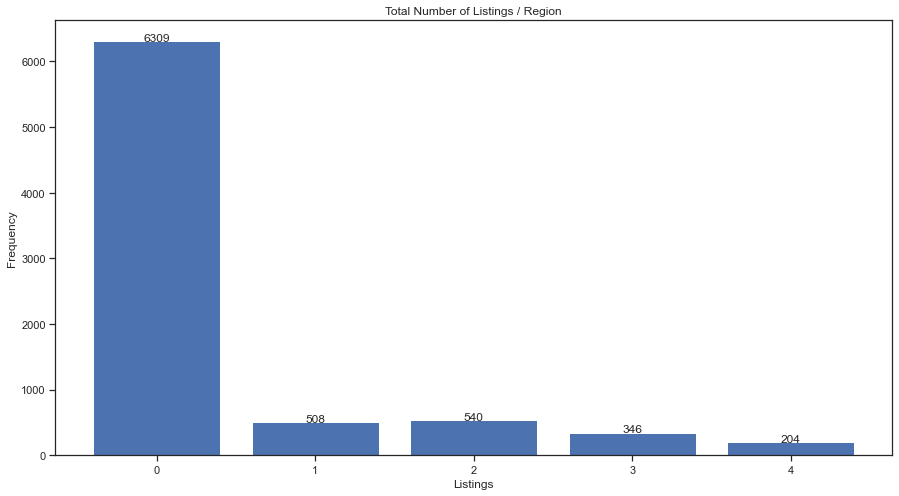

In [44]:
# Total # of Listings / Region AFTER dropping NULL
count = 0
counter0 = 0 # Central Region
counter1 = 0 # East Region
counter2 = 0 # West Region
counter3 = 0 # North-East Region
counter4 = 0 # North Region

list = [0, 1, 2, 3, 4]
counterlist = [counter0, counter1, counter2, counter3, counter4]

df_air_listings = df_air[['neighbourhood_group']]

for i in list:
    temp = len(df_air[df_air['neighbourhood_group']==i])
    counterlist[count]+=temp
    count+=1
    
print(counterlist)
count = 0

plt.figure(figsize=(15,8))
plt.bar(list, counterlist) # Swap to barh for horizontal
plt.xlabel('Listings')
plt.ylabel('Frequency')
plt.title('Total Number of Listings / Region')

for i in counterlist:
    plt.text(list[count], i, str(i), ha='center') # Swap around x and y for horizontal / veritcal
    count+=1
    
plt.show()


In [45]:
df_air['price'].describe()


count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

In [46]:
Q1 = df_air['price'].describe()[4]
Q2 = df_air['price'].describe()[5]
Q3 = df_air['price'].describe()[6]

IQR = Q3 - Q1
IQR_MAX = Q3 + 1.5 * IQR
IQR_MIN = Q1 - 1.5 * IQR
print(IQR_MAX)

400.0


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

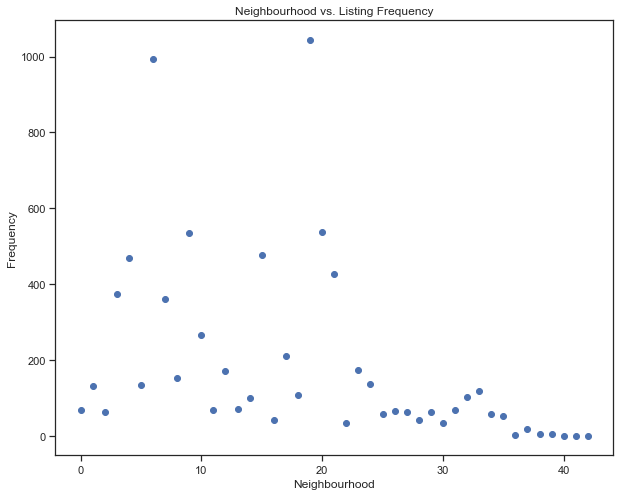

In [47]:
plt.figure(figsize=(10,8))
# name = df_air['neighbourhood'].value_counts().index
value = df_air['neighbourhood'].value_counts().sort_index() # Sort by value's order

plt.scatter(value.index, value) # x - take the index of the sorted index

plt.xlabel('Neighbourhood')                                        
plt.ylabel('Frequency')
plt.title('Neighbourhood vs. Listing Frequency')
value.index


Text(0.5, 1.0, 'Reviews vs. Price')

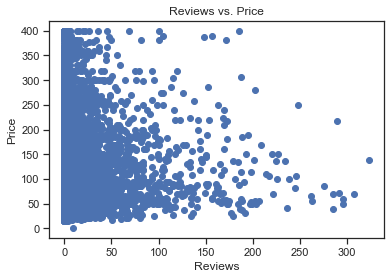

In [48]:
df_price = df_air.drop(df_air[(df_air['price'] > IQR_MAX)].index) # Removing outilers
plt.scatter(df_price['number_of_reviews'], df_price['price']) # We can see that even with higher rating, the price
plt.xlabel('Reviews')                                         # remains on a fair level.
plt.ylabel('Price')
plt.title('Reviews vs. Price')

In [49]:
df_air.corr()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day_difference
neighbourhood_group,1.000000,0.275647,0.800676,-0.214990,0.199243,-0.048089,0.100838,-0.033301,-0.052633,-0.185943,-0.070137,0.063906
neighbourhood,0.275647,1.000000,0.222234,-0.285561,0.037868,0.065002,0.053818,-0.070067,-0.046095,0.059994,0.056811,0.042542
latitude,0.800676,0.222234,1.000000,-0.034970,0.152583,-0.073990,0.084924,-0.015022,-0.038035,-0.149961,-0.068740,0.062591
longitude,-0.214990,-0.285561,-0.034970,1.000000,-0.060212,-0.030436,-0.029208,0.102109,0.099575,0.049416,-0.035727,-0.044761
room_type,0.199243,0.037868,0.152583,-0.060212,1.000000,-0.175679,0.015375,0.017594,-0.022954,-0.329129,0.023337,-0.004245
price,-0.048089,0.065002,-0.073990,-0.030436,-0.175679,1.000000,-0.012214,-0.042013,-0.030822,0.016555,0.017451,0.070171
minimum_nights,0.100838,0.053818,0.084924,-0.029208,0.015375,-0.012214,1.000000,-0.076475,-0.148959,-0.013964,0.150356,0.199131
number_of_reviews,-0.033301,-0.070067,-0.015022,0.102109,0.017594,-0.042013,-0.076475,1.000000,0.673734,-0.149681,-0.066658,-0.364330
reviews_per_month,-0.052633,-0.046095,-0.038035,0.099575,-0.022954,-0.030822,-0.148959,0.673734,1.000000,-0.180527,-0.107701,-0.518073
calculated_host_listings_count,-0.185943,0.059994,-0.149961,0.049416,-0.329129,0.016555,-0.013964,-0.149681,-0.180527,1.000000,0.246230,0.087959


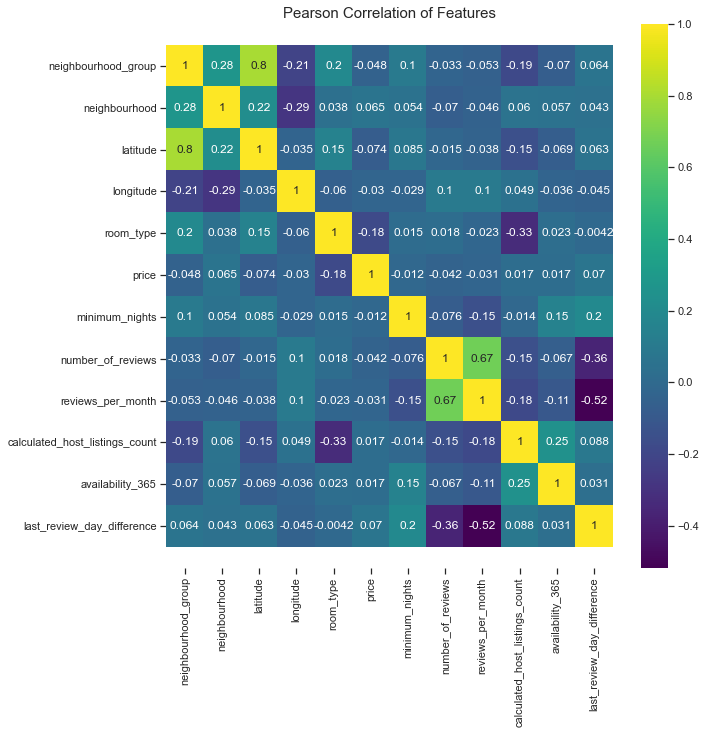

In [51]:
# sns.set(style="ticks")
# sns.pairplot(df_air[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review_day_difference']])

# Heatmap: the correlation between any two features/variables
# colormap = plt.cm.viridis
# plt.figure(figsize=(10,10))
# plt.title('Pearson Correlation of Features', size=15)
# ax = sns.heatmap(df_air.astype(float).corr(), cmap=colormap, annot=True)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.show()

In [29]:
df_air.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_day_difference
count,5.148000e+03,5.148000e+03,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,2.143747e+07,8.032118e+07,0.407148,14.755245,1.313295,103.849818,0.540404,151.311189,12.465229,19.670552,1.043854,35.222222,201.144716,701.052642
std,9.873083e+06,7.797952e+07,0.935310,7.822959,0.029295,0.043747,0.596700,253.827678,32.413304,34.937245,1.285907,60.130843,142.639212,337.740007
min,4.909100e+04,2.366600e+04,0.000000,0.000000,1.243910,103.646560,0.000000,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,474.000000
25%,1.396711e+07,1.740449e+07,0.000000,8.000000,1.295970,103.837740,0.000000,62.000000,1.000000,2.000000,0.180000,2.000000,55.000000,494.000000
50%,2.197951e+07,4.668531e+07,0.000000,15.000000,1.310705,103.849805,0.000000,115.000000,3.000000,6.000000,0.550000,8.000000,239.000000,535.000000
75%,2.991207e+07,1.341874e+08,0.000000,19.000000,1.320337,103.876233,1.000000,187.000000,6.000000,21.000000,1.370000,32.000000,346.000000,753.000000
max,3.785242e+07,2.823325e+08,4.000000,41.000000,1.452030,103.973420,2.000000,10000.000000,700.000000,323.000000,13.000000,274.000000,365.000000,2610.000000


### 2.4 Export the data

In [245]:
df_air.to_csv('listing_data_new.csv', index=False)